In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
class Image(object):
  def __init__(self, path):
    self.path = path
    self.bgr_img = None
    self.gray_image = None
    self.rgb_image = None

  def read_image(self, return_img = False):
    self.bgr_img = cv2.imread(self.path)
    if return_img:
      return self.bgr_img

  def rgb(self, return_img = False):
    self.rgb_image = np.flip(self.bgr_img, axis=-1)
    # print(self.bgr_img.shape)
    if return_img:
      return self.rgb_image

  def gray(self, return_img = False):
    self.gray_img = cv2.cvtColor(self.bgr_img, cv2.COLOR_BGR2GRAY)
    if return_img:
      return self.gray_img

  def show(self, img, title="image"):
    if len(img.shape) != 3:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.title(title)
    plt.show()

  def show_all(self, image_list, title_list):
    plt.figure(figsize=[20,10])
    assert len(image_list) == len(title_list), "Houston we've got a problem"
    N = len(image_list)
    for index, (img, title) in enumerate(zip(image_list, title_list)):
      plt.subplot(1, N, index+1)
      if len(img.shape) != 3:
        plt.imshow(img, cmap='gray')
      else:
          plt.imshow(img)
      plt.title(title)
    plt.show()

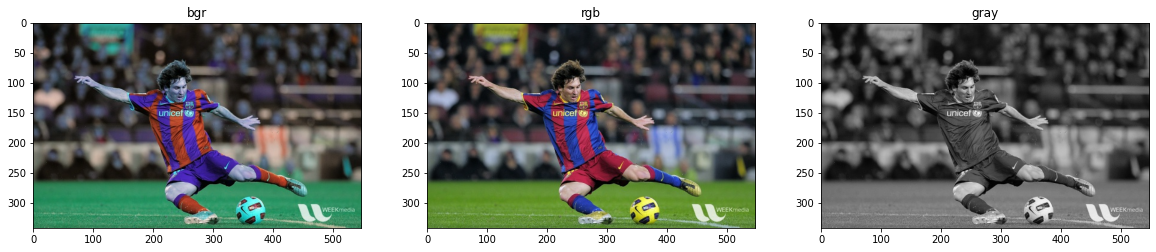

In [3]:
image = Image('./messi.jpg')
bgr = image.read_image(return_img=True)
rgb = image.rgb(return_img=True)
gray = image.gray(return_img=True)
image.show_all([bgr,rgb,gray],["bgr", "rgb","gray"])

In [0]:
def convolve2d(image, kernel):
  image_h, image_w = image.shape
  kernel_h, kernel_w = kernel.shape

  image_padded = np.zeros(shape=(image_h + kernel_h, image_w + kernel_w))    
  image_padded[kernel_h//2:-kernel_h//2, kernel_w//2:-kernel_w//2] = image
  
  out = np.zeros(shape=image.shape)
  for row in range(image_h):
    for col in range(image_w):
      for i in range(kernel_h):
        for j in range(kernel_w):
          out[row, col] += image_padded[row + i, col + j]*kernel[i, j]
  return out

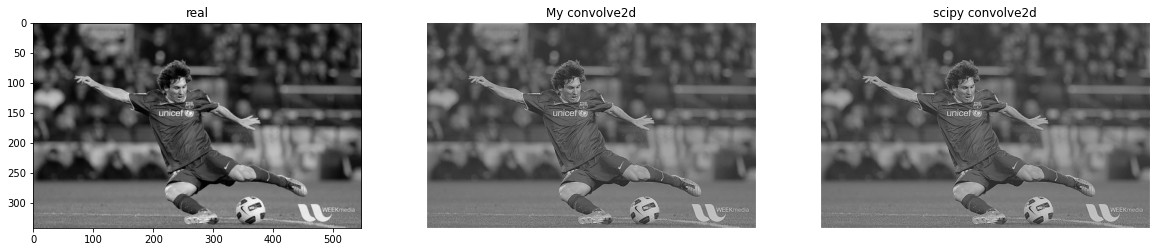

In [5]:
kernel = np.array([[0,-1,0],[-1,8,-1],[0,-1,0]])/4
image_equalized = gray/np.max(np.abs(gray))
image_kernel = convolve2d(image_equalized, kernel)
plt.figure(figsize=[20, 10])
plt.subplot(131)
plt.imshow(image_equalized, cmap=plt.cm.gray)
plt.title('real')
plt.subplot(132)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title('My convolve2d')
plt.axis('off')
import scipy.signal
image_kernel = scipy.signal.convolve2d(image_equalized, kernel, 'same')
plt.subplot(133)
plt.imshow(image_kernel, cmap=plt.cm.gray)
plt.title("scipy convolve2d")
plt.axis('off')
plt.show()

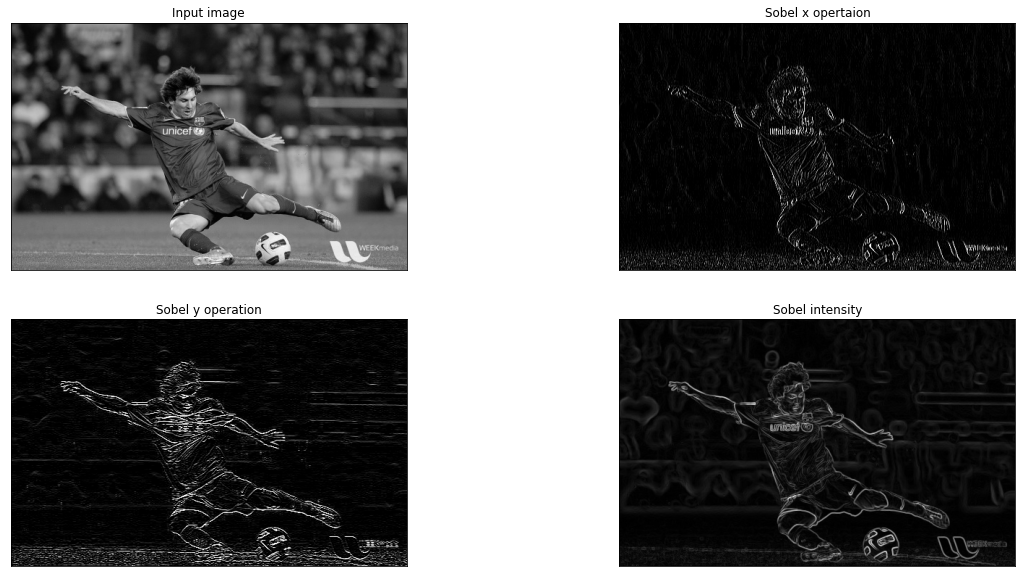

In [6]:
sobelx = cv2.Sobel(gray, cv2.CV_8U, 2, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_8U, 0, 2, scale=1.5)

sobelx32F = cv2.Sobel(gray, cv2.CV_32F, 1, 0, ksize=3)
sobely32F = cv2.Sobel(gray, cv2.CV_32F, 0, 1, ksize=3)
sobel_intens = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx32F, 2.0), 1.0, cv2.pow(sobely32F, 2.0), 1.0, 0.0))

plt.figure(figsize=[20, 10])
plt.subplot(221),plt.imshow(gray, cmap = 'gray')
plt.title('Input image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(sobelx, cmap = 'gray')
plt.title('Sobel x opertaion'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(sobely, cmap = 'gray')
plt.title('Sobel y operation'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(sobel_intens, cmap = 'gray')
plt.title('Sobel intensity'), plt.xticks([]), plt.yticks([])

plt.show()

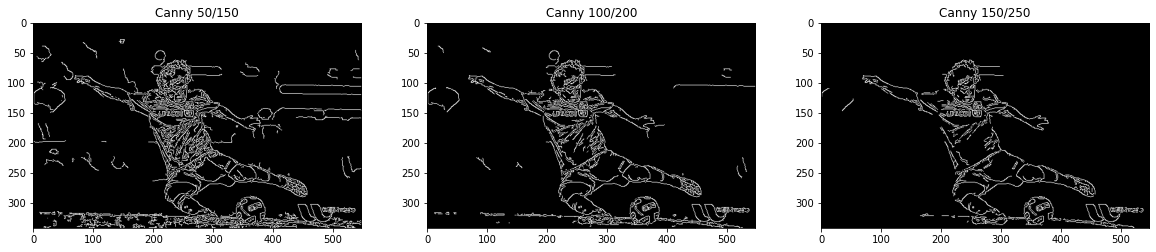

In [7]:
canny50150 = cv2.Canny(gray, 50, 150, apertureSize=3, L2gradient=False)
canny100200 = cv2.Canny(gray, 100, 200)
canny150250 = cv2.Canny(gray, 150, 250)


plt.figure(figsize=[20, 10])

plt.subplot(131)
plt.imshow(canny50150, cmap = 'gray')
plt.title('Canny 50/150')

plt.subplot(132)
plt.imshow(canny100200, cmap = 'gray')
plt.title('Canny 100/200')

plt.subplot(133)
plt.imshow(canny150250, cmap = 'gray')
plt.title('Canny 150/250')

plt.show()

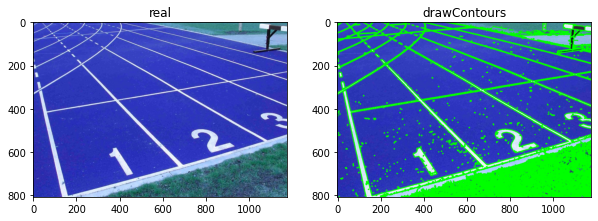

In [8]:
img_track = cv2.imread('./track.jpg')
imgray = cv2.cvtColor(img_track,cv2.COLOR_BGR2GRAY)

canny_track = cv2.Canny(imgray, 50, 150)
contours, _ = cv2.findContours(canny_track, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_track_draw = cv2.drawContours(img_track.copy(), contours, -1, (0,255,0), 3)

plt.figure(figsize=[10, 10])
plt.subplot(121)
plt.imshow(img_track)
plt.title('real')
plt.subplot(122)
plt.imshow(img_track_draw)
plt.title('drawContours')
plt.show()